<a href="https://colab.research.google.com/github/jasonhckim/DNN_Keras_MNIST/blob/main/DNN_Keras_MNIST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


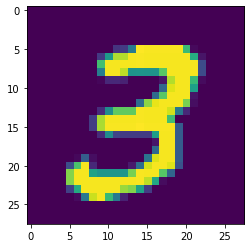

In [4]:
plt.imshow(trainsetX[7])
plt.show()

In [5]:
print(trainsety[7])

3


In [7]:
trainsetX[7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

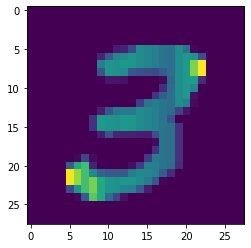

In [9]:
import tensorflow as tf
x_train = tf.keras.utils.normalize(trainsetX,axis=1)
x_test = tf.keras.utils.normalize(testsetX,axis=1)
plt.imshow(x_train[7])

In [12]:
imgsize = 28
x_trainr = np.array(x_train).reshape(-1,imgsize,imgsize,1)
print(x_trainr.shape)
x_testr= np.array(x_test).reshape(-1,imgsize,imgsize,1)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

In [25]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

In [29]:
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))

In [30]:
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_4 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_1 (Dense)             (None, 64)                692288    
                                                                 
 activation_5 (Activation)   (None, 64)                0         
                                                      

In [32]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.fit(x_trainr,trainsety,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.2594 - accuracy: 0.9232 - val_loss: 0.1172 - val_accuracy: 0.9635
Epoch 2/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0878 - accuracy: 0.9731 - val_loss: 0.1018 - val_accuracy: 0.9678
Epoch 3/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0602 - accuracy: 0.9816 - val_loss: 0.0773 - val_accuracy: 0.9769
Epoch 4/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0844 - val_accuracy: 0.9764
Epoch 5/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0751 - val_accuracy: 0.9798


In [34]:
pred = model.predict([x_testr])

In [43]:
print(np.argmax(pred[170]))

4


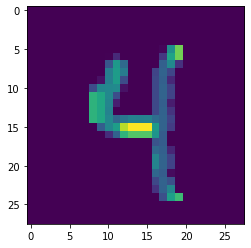

In [44]:
plt.imshow(x_test[170])